# Credit Approval

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

<!--  Attribute Information:


1.  Male (A1):                b, a.      
2.  Age (A2):                 continuous. 
3.  Debt (A3):                continuous. 
4.  Married (A4):             u, y, l, t. 
5.  BankCustomer (A5):        g, p, gg.
6.  EducationLevel  (A6):     c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
7.  Ethnicity (A7):           v, h, bb, j, n, z, dd, ff, o.
8.  YearsEmployed (A8):       continuous.
9.  PriorDefault (A9):        t, f.
10. Employed (A10):           t, f.
11. CreditScore (A11):        continuous.
12. DriversLicense  (A12):    t, f.
13. Citizen (A13):            g, p, s.
14. ZipCode (A14):            continuous.
15. Income (A15):             continuous.
16. Approved (A16):            +,- -->

1. Gender : num 1 1 0 0 0 0 1 0 0 0 ...
2. Age : chr "58.67" "24.50" "27.83" "20.17" ...
3. Debt : num 4.46 0.5 1.54 5.62 4 ...
4. Married : chr "u" "u" "u" "u" ...
5. BankCustomer : chr "g" "g" "g" "g" ...
6. EducationLevel: chr "q" "q" "w" "w" ...
7. Ethnicity : chr "h" "h" "v" "v" ...
8. YearsEmployed : num 3.04 1.5 3.75 1.71 2.5 ...
9. PriorDefault : When you accept a credit card, you agree to certain terms. For example, you agree to make your minimum payment by the due date listed on your credit card statement. If you miss the minimum payment six months in a row, your credit card will be in default. Your credit card issuer will likely close your account and report the default to the credit bureaus.
                 In the months leading up to a default, your (late) payment status will be reported to the three major credit bureaus, and your credit score will be impacted by the lateness of your payments. If you apply for any new credit cards or loans after a default, your application will likely be denied because creditors think you are at risk of defaulting on any new credit obligations. In fact, some lenders will not approve you at all until you have cleared up the default balance (or it drops off your credit report).
       0:Default, 1:no prior default
10. Employed : num 1 0 1 0 0 0 0 0 0 0 ...
11. CreditScore : Lenders use credit scores to evaluate the probability that an individual will repay loans in a timely manner.
12. DriversLicense: chr "f" "f" "t" "f" ...
13. Citizen : chr "g" "g" "g" "s" ...
14. ZipCode : chr "00043" "00280" "00100" "00120" ...
15. Income : num 560 824 3 0 0 ...
16. Approved : chr "+" "+" "+" "+" ...

Credit card being held in hand

We'll use the Credit Card Approval dataset from the UCI Machine Learning Repository. The structure of this notebook is as follows:

First, we will start off by loading and viewing the dataset.
We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.
We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
After our data is in good shape, we will do some exploratory data analysis to build our intuitions.
Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.
First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('crx.data',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
dataset.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but [Analysis of Credit Approval Data](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)  blog gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.


In [5]:
columns = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore","DriversLicense","Citizen","ZipCode","Income","Approved"]

In [6]:
dataset.columns = columns

In [7]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [9]:
dataset['Approved']

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: Approved, Length: 690, dtype: object

In [10]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
YearsEmployed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


In [11]:
dataset.shape

(690, 16)

In [12]:
for feature in dataset:
    print(f'{feature} is {dataset[feature].unique()}:{dataset[feature].value_counts().unique()}\n')  

Gender is ['b' 'a' '?']:[468 210  12]

Age is ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' 

# Handling the missing values
We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:

- Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
- The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.
- Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.
Now, let's temporarily replace these missing value question marks with NaN.

## replacing ? with nan

In [13]:
dataset.replace('?', np.NaN, inplace=True)

In [14]:
dataset.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [15]:
dataset['Gender'].value_counts()

b    468
a    210
Name: Gender, dtype: int64

In [16]:
dataset['ZipCode'].unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', nan, '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [17]:
dataset['Gender'].unique()

array(['b', 'a', nan], dtype=object)

In [18]:
dataset['Age'].unique()

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
       '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
       '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
       '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
       '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
       '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
       '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
       '39.83', nan, '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
       '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
       '18.67', '54.83', '40.92', '19.75', '29.17', '24.58', '33.75',
       '25.42',

In [19]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Gender 0.0174  % missing values
Age 0.0174  % missing values
Married 0.0087  % missing values
BankCustomer 0.0087  % missing values
EducationLevel 0.013  % missing values
Ethnicity 0.013  % missing values
ZipCode 0.0188  % missing values


We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.

An important question that gets raised here is why are we giving so much importance to missing values? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly.

So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.

In [20]:
dataset['Age']=dataset['Age'].astype(float)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


In [22]:
dataset['Approved'].replace(['+','-'],[1,0],inplace=True)
dataset

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0


In [23]:
dataset.to_csv('credit-approval.csv', index = False)

In [24]:
# Impute the missing values with mean imputation
dataset.fillna(dataset.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
print('Total NaN: ' + str(dataset.isnull().values.sum()))
dataset.isnull().sum()

Total NaN: 55


Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.

In [25]:
# Iterate over each column of dataset
for col in dataset:
    # Check if the column is of object type
    if dataset[col].dtypes == 'O':
        # Impute with the most frequent value
        dataset = dataset.fillna(dataset[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print('Total missing values:' + str(dataset.isnull().values.sum()))
print('Missing values in each column:')
dataset.isnull().sum()

Total missing values:0
Missing values in each column:


Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

## variables
1. Numerical
  - discrete
  - continous
2. Categorical

## Numerical variables

In [26]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  6


,Age,Debt,YearsEmployed,CreditScore,Income,Approved
0,30.83,0.000,1.25,1,0,1
1,58.67,4.460,3.04,6,560,1
2,24.50,0.500,1.50,0,824,1
3,27.83,1.540,3.75,5,3,1
4,20.17,5.625,1.71,0,0,1


## 1. Discrete Variables

In [27]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [28]:
discrete_feature

['CreditScore', 'Approved']

In [29]:
## As Approved is the dependent variable we remove that from discrete features list
discrete_feature.remove('Approved')

In [30]:
dataset[discrete_feature].head()

,CreditScore
0,1
1,6
2,0
3,5
4,0


 ## 2. Continous variables

In [31]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature and feature!="Approved"]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [32]:
dataset[continuous_feature].head()

,Age,Debt,YearsEmployed,Income
0,30.83,0.000,1.25,0
1,58.67,4.460,3.04,560
2,24.50,0.500,1.50,824
3,27.83,1.540,3.75,3
4,20.17,5.625,1.71,0


## Categorical variable

In [33]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode']

In [34]:
dataset[categorical_features].head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode
0,b,u,g,w,v,t,t,f,g,00202
1,a,u,g,q,h,t,t,f,g,00043
2,a,u,g,q,h,t,f,f,g,00280
3,b,u,g,w,v,t,t,t,g,00100
4,b,u,g,w,v,t,f,f,s,00120


In [35]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Married and number of categories are 4
The feature is BankCustomer and number of categories are 4
The feature is EducationLevel and number of categories are 15
The feature is Ethnicity and number of categories are 10
The feature is PriorDefault and number of categories are 2
The feature is Employed and number of categories are 2
The feature is DriversLicense and number of categories are 2
The feature is Citizen and number of categories are 3
The feature is ZipCode and number of categories are 171


# EDA

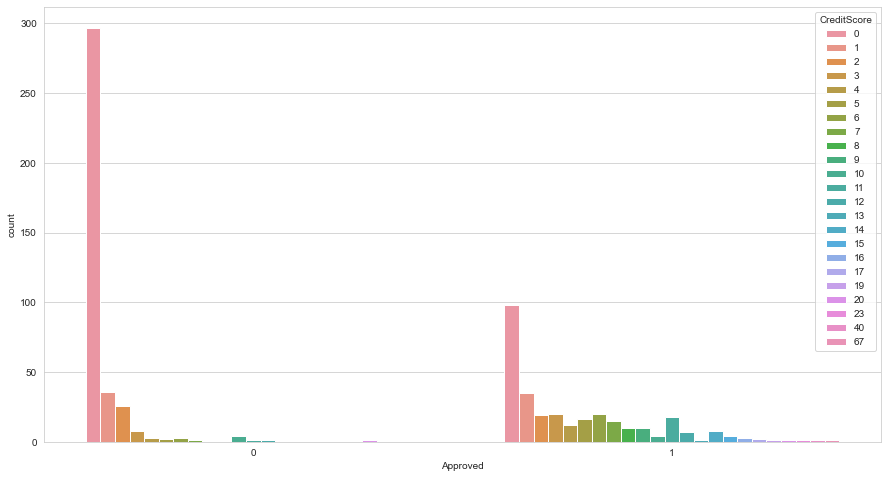

In [36]:
for feature in discrete_feature:
    data=dataset.copy()
    plt.figure(figsize=(15,8))
    sns.set_style('whitegrid')
    sns.countplot(x='Approved',hue=feature,data=data)

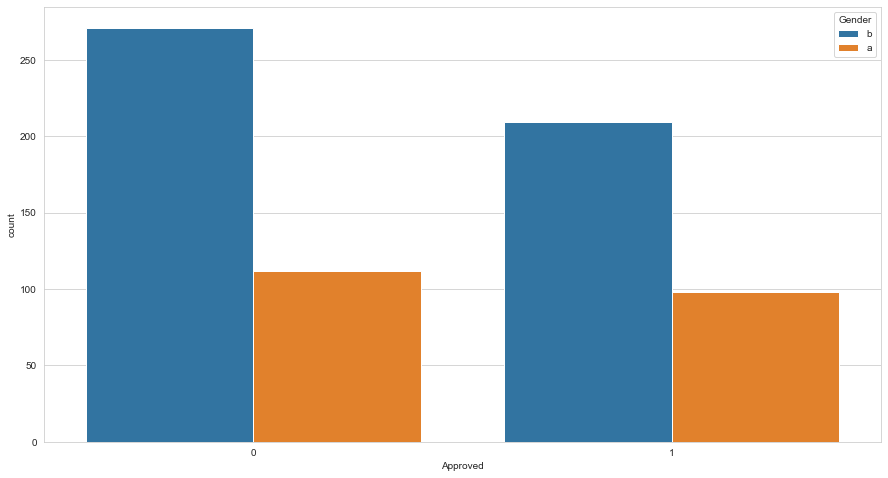

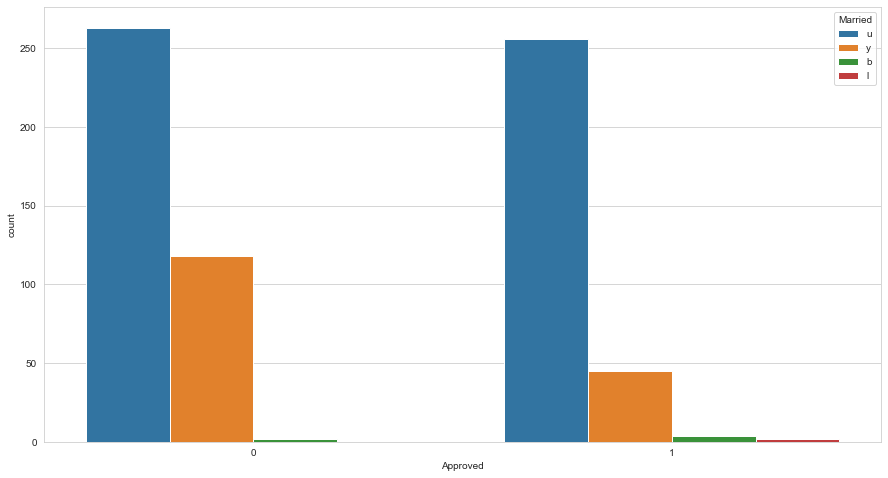

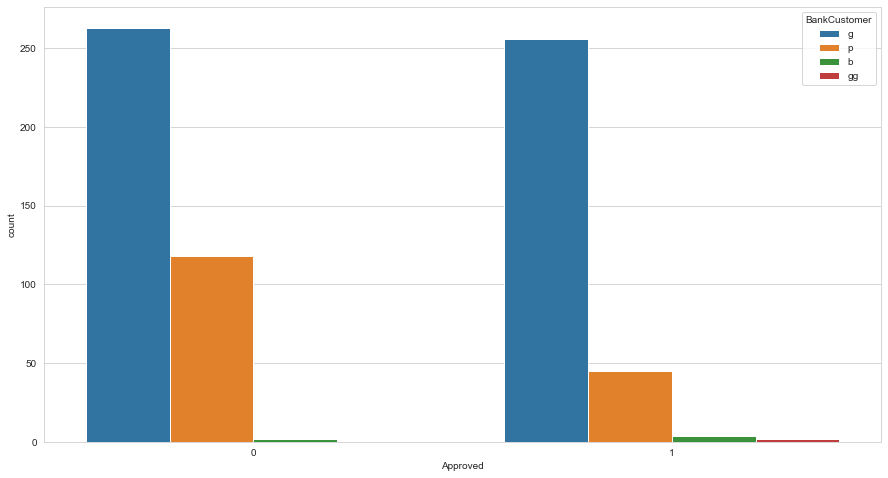

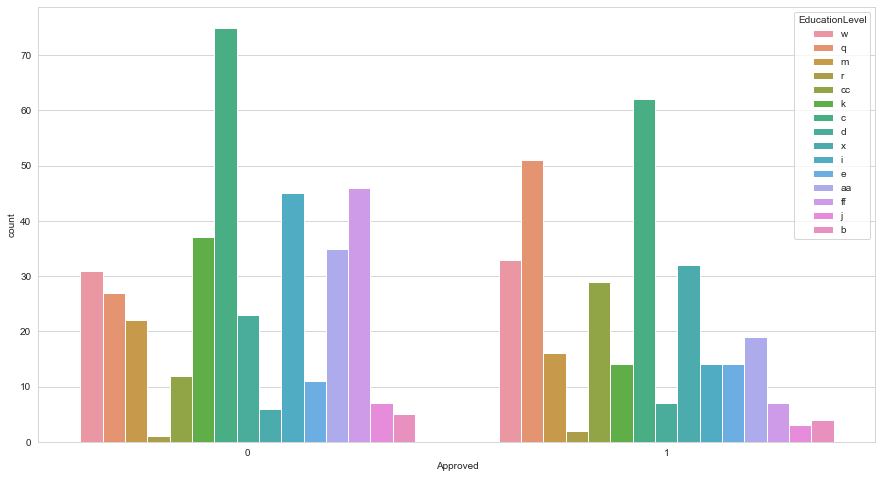

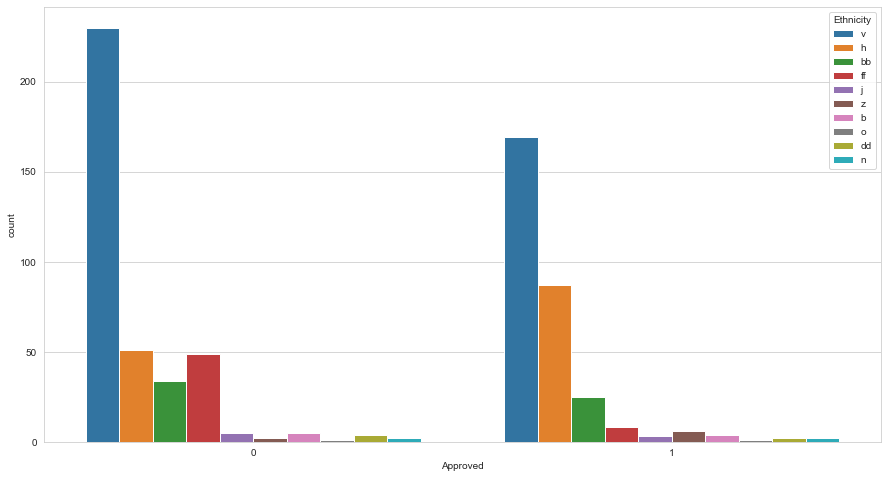

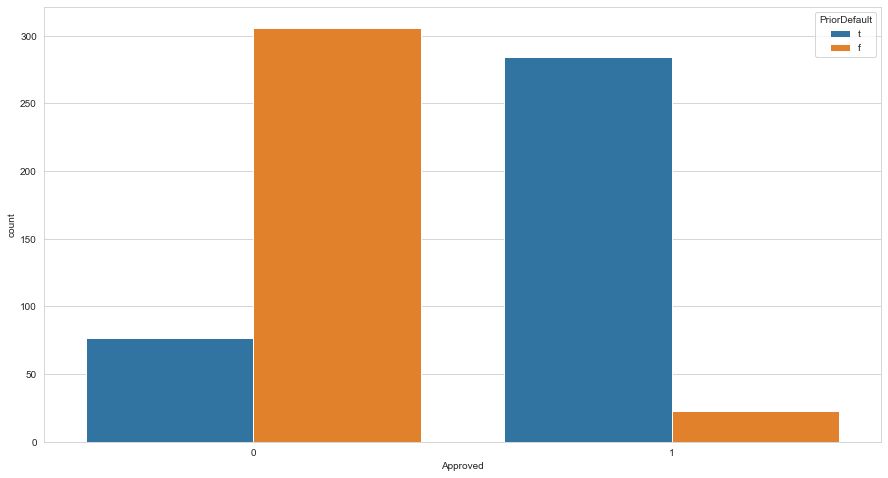

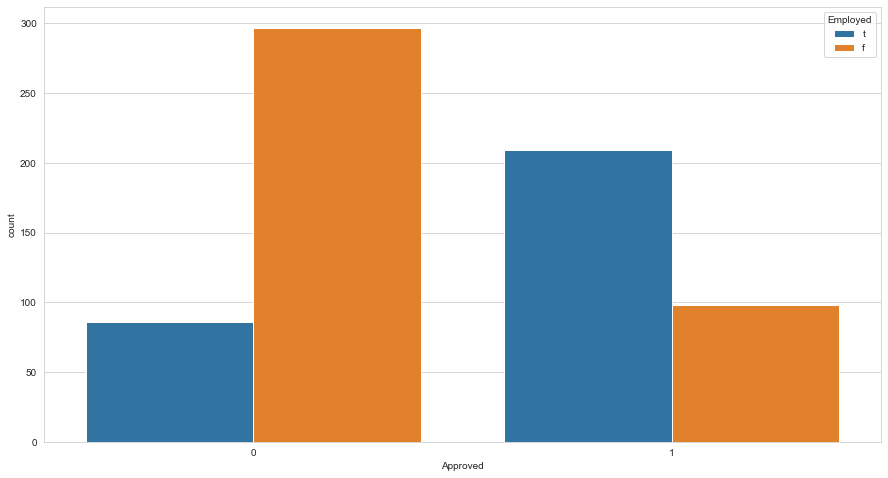

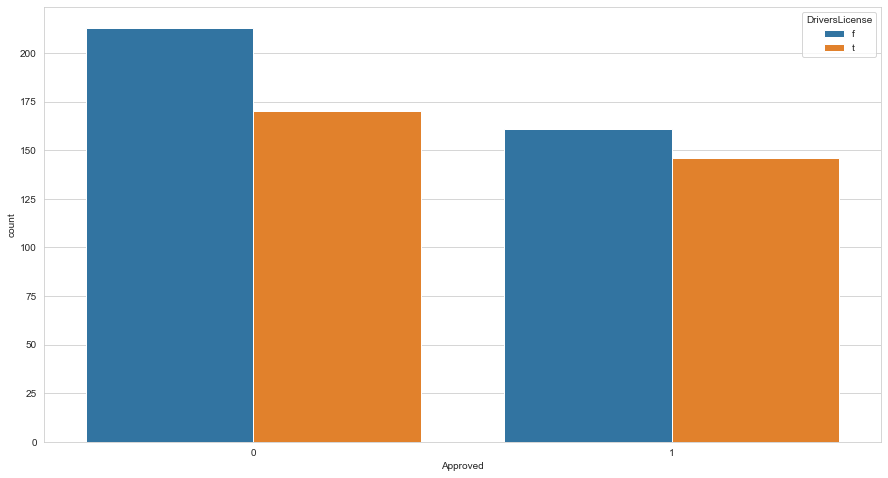

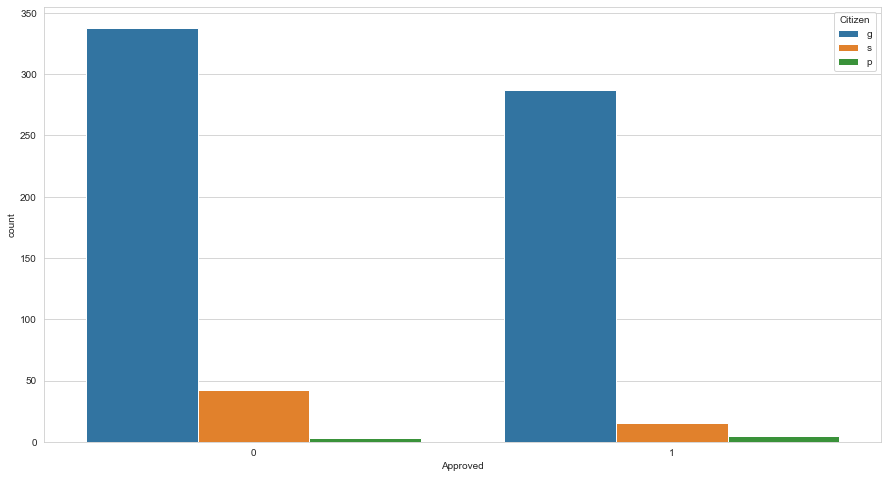

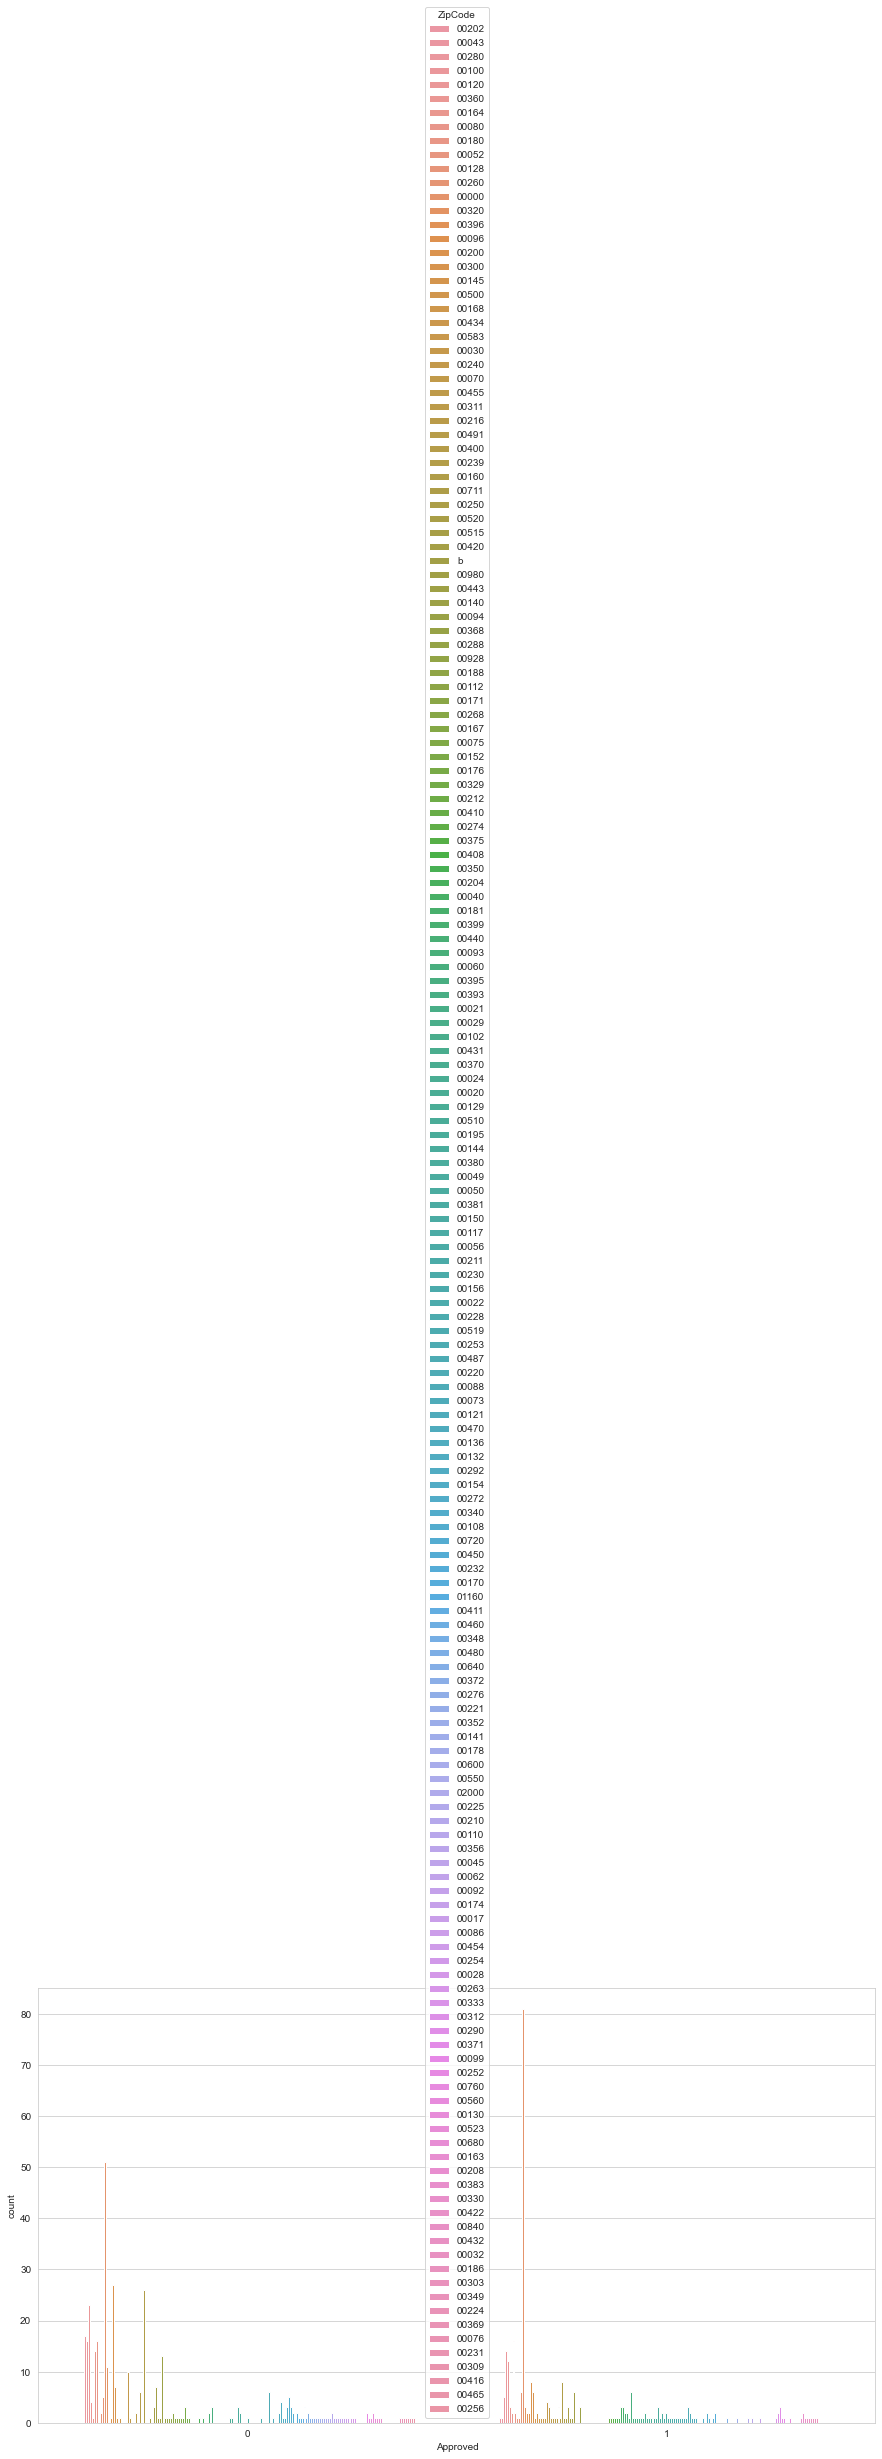

In [37]:
for feature in categorical_features:
    data=dataset.copy()
    plt.figure(figsize=(15,8))
    sns.set_style('whitegrid')
    sns.countplot(x='Approved',hue=feature,data=data)

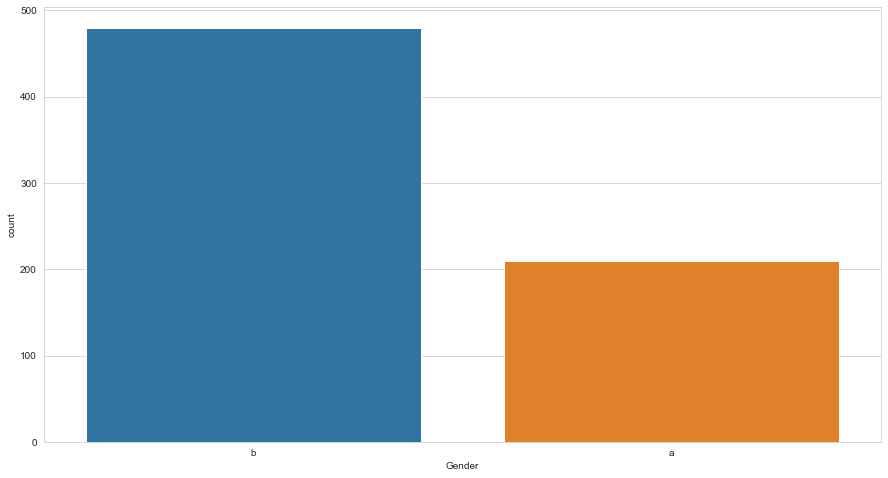

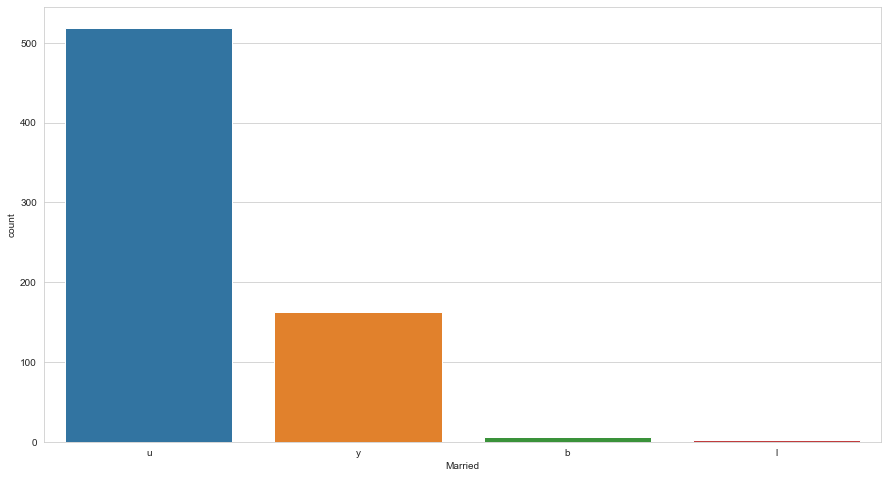

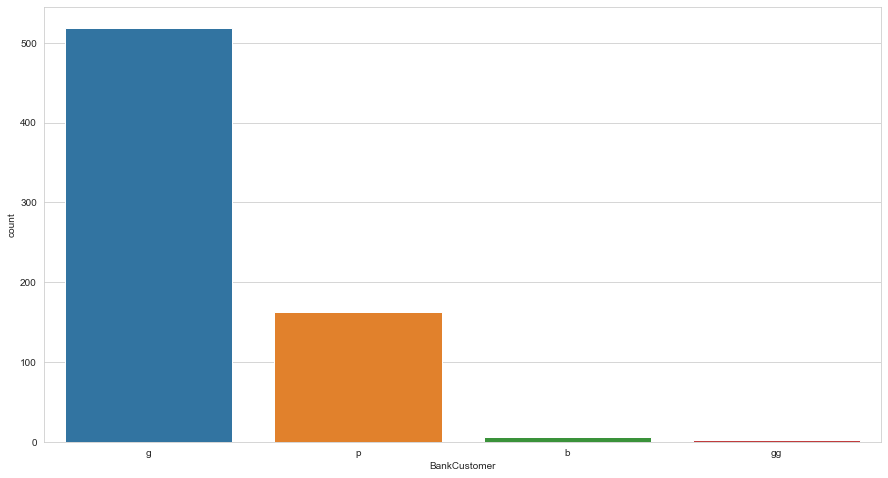

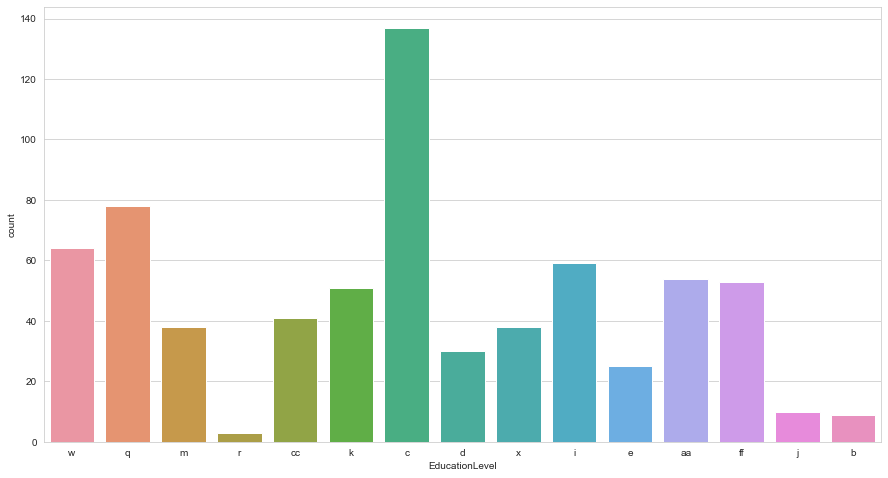

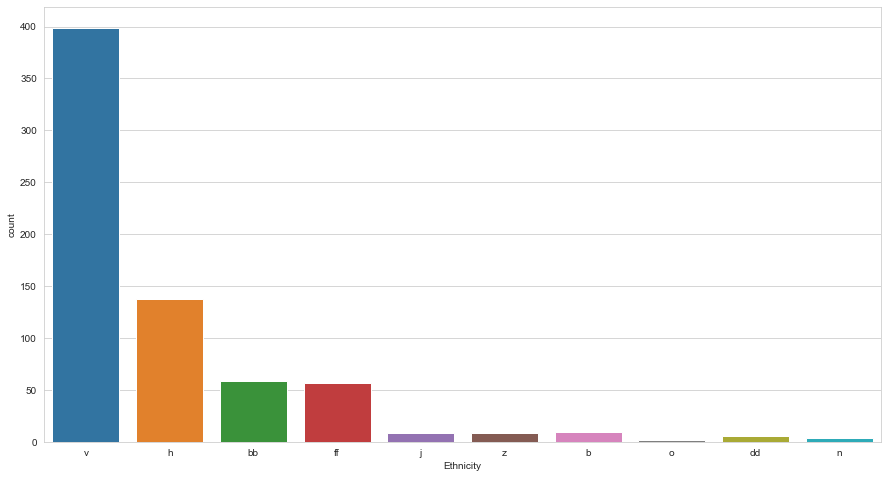

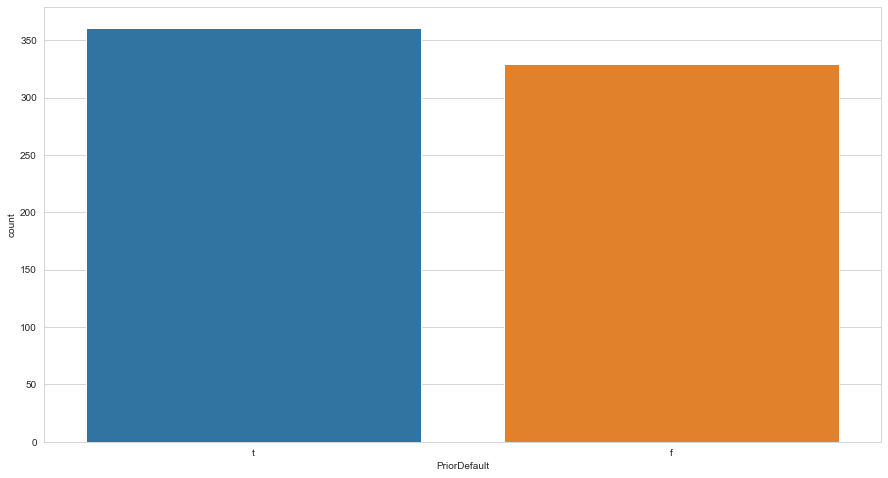

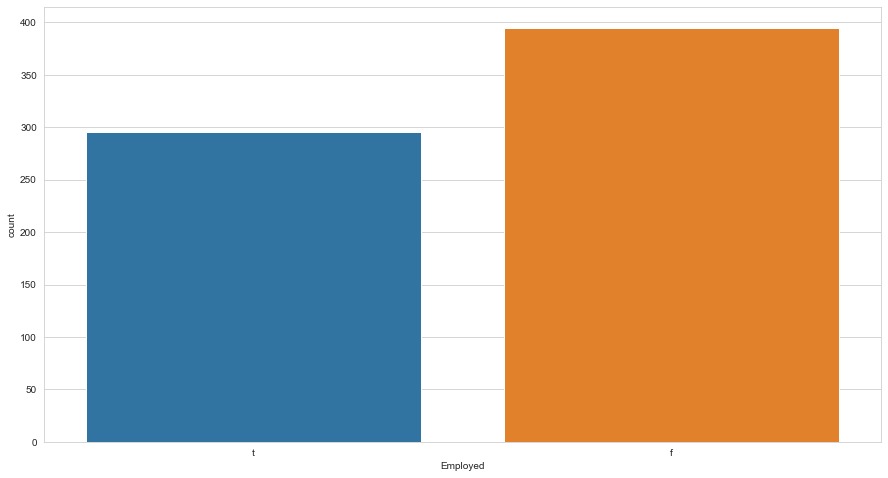

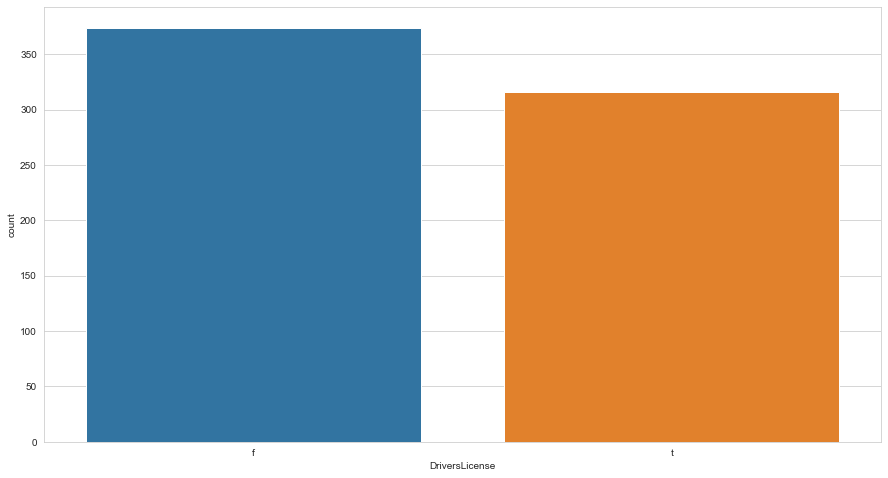

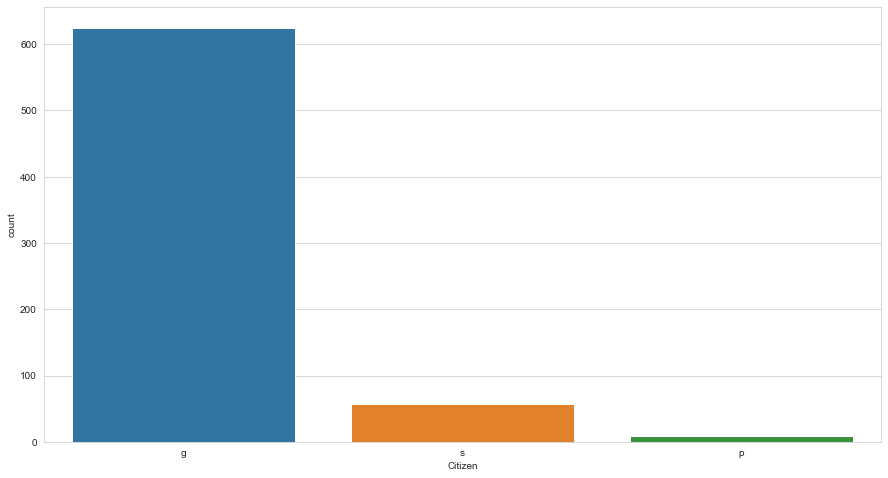

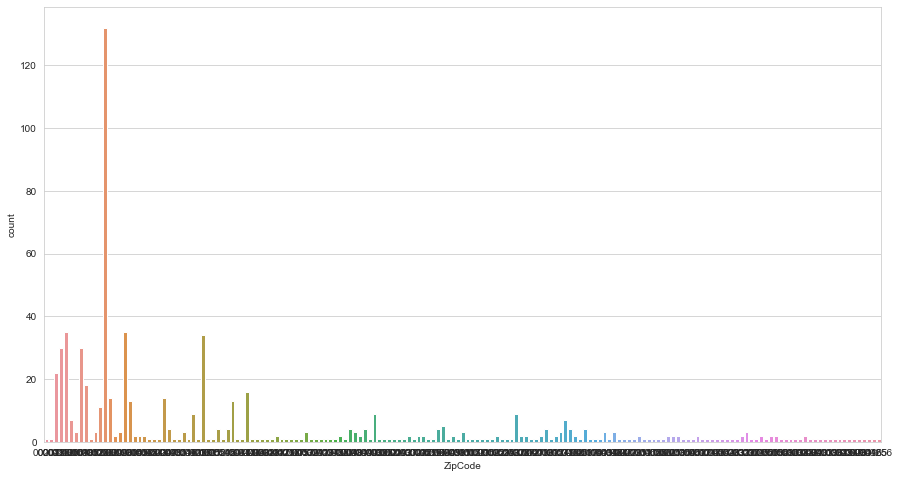

In [38]:
for feature in categorical_features:
    data=dataset.copy()
    plt.figure(figsize=(15,8))
    sns.countplot(x=feature,data=dataset)

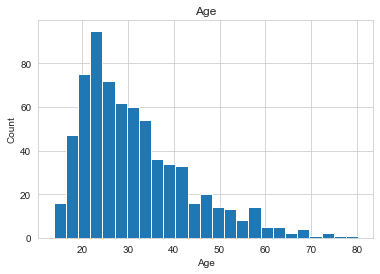

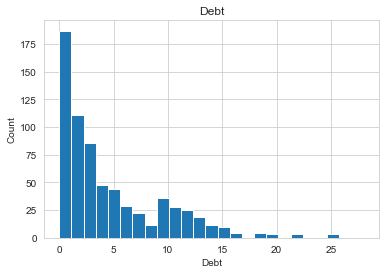

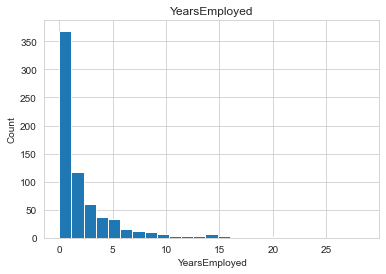

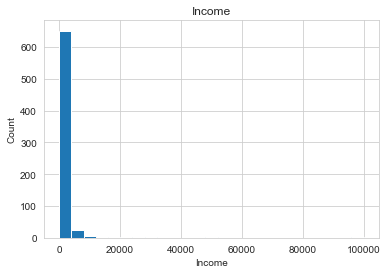

In [39]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

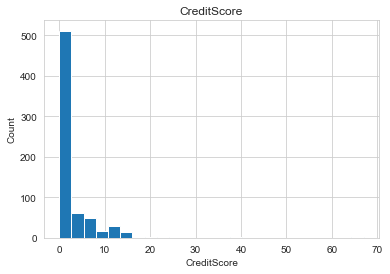

In [40]:
for feature in discrete_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [41]:
from pandas_profiling import ProfileReport
profile=ProfileReport(dataset,explorative=True)
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### check outlier

In [42]:
def draw(data):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    sns.boxplot(data)
    plt.show()

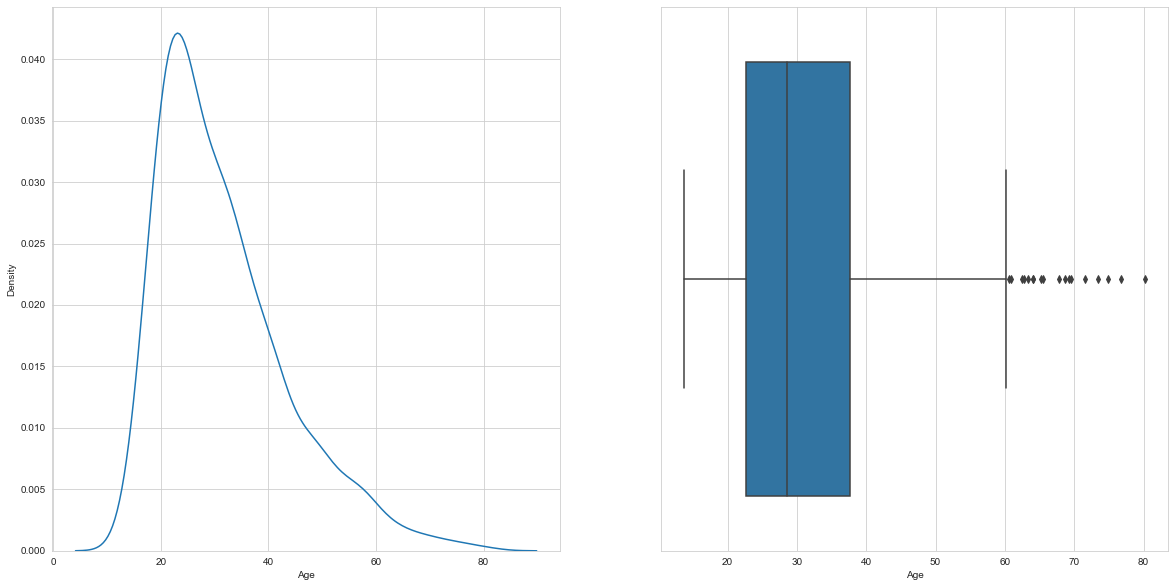

In [43]:
draw(dataset["Age"])

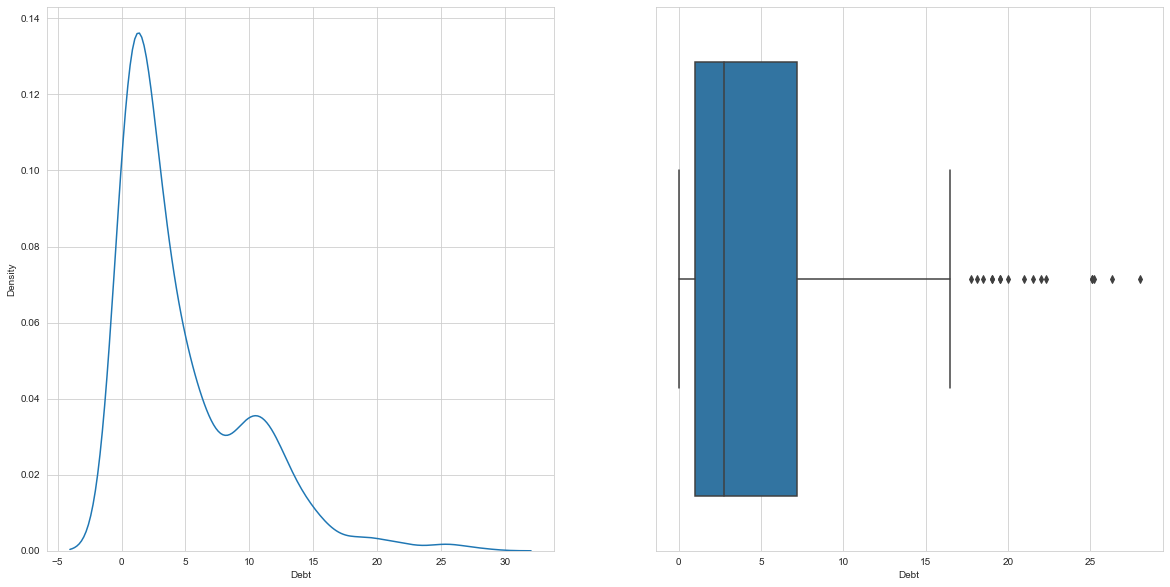

In [44]:
draw(dataset["Debt"])

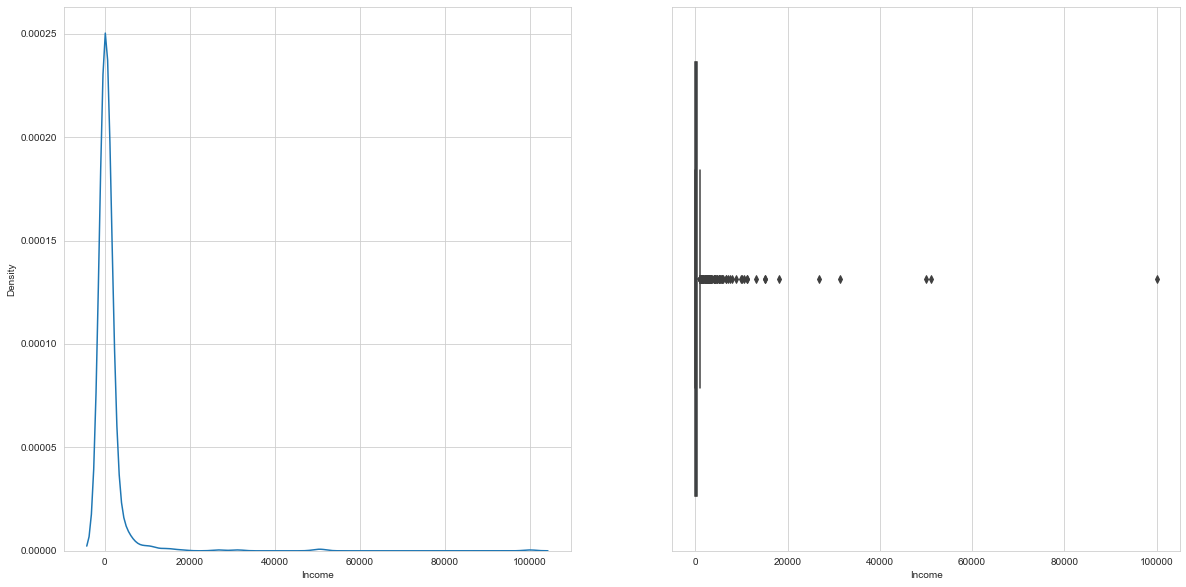

In [45]:
draw(dataset["Income"])

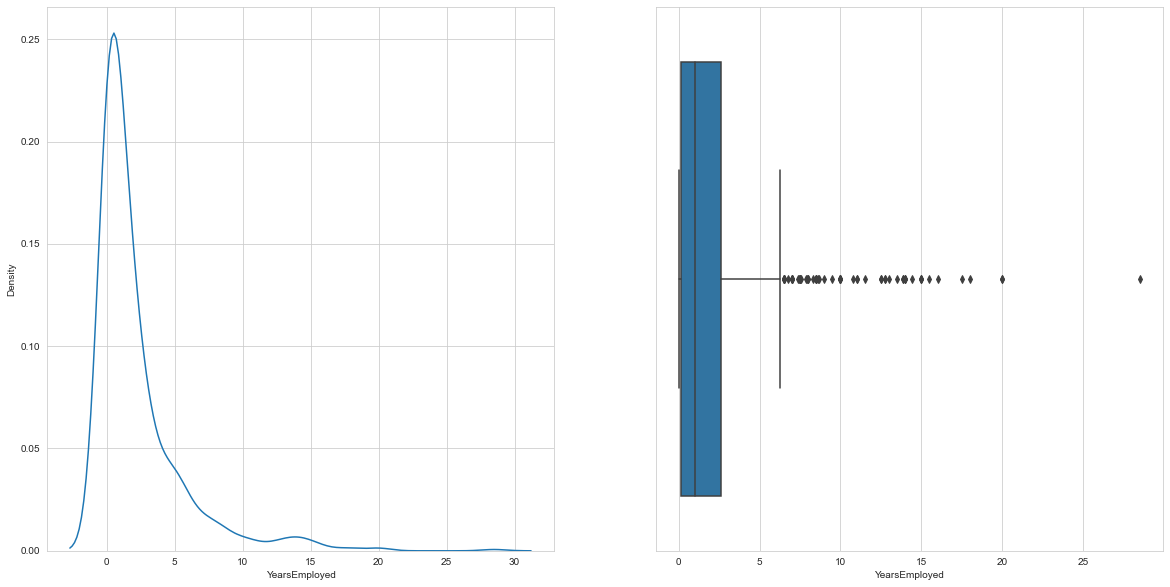

In [46]:
draw(dataset["YearsEmployed"])

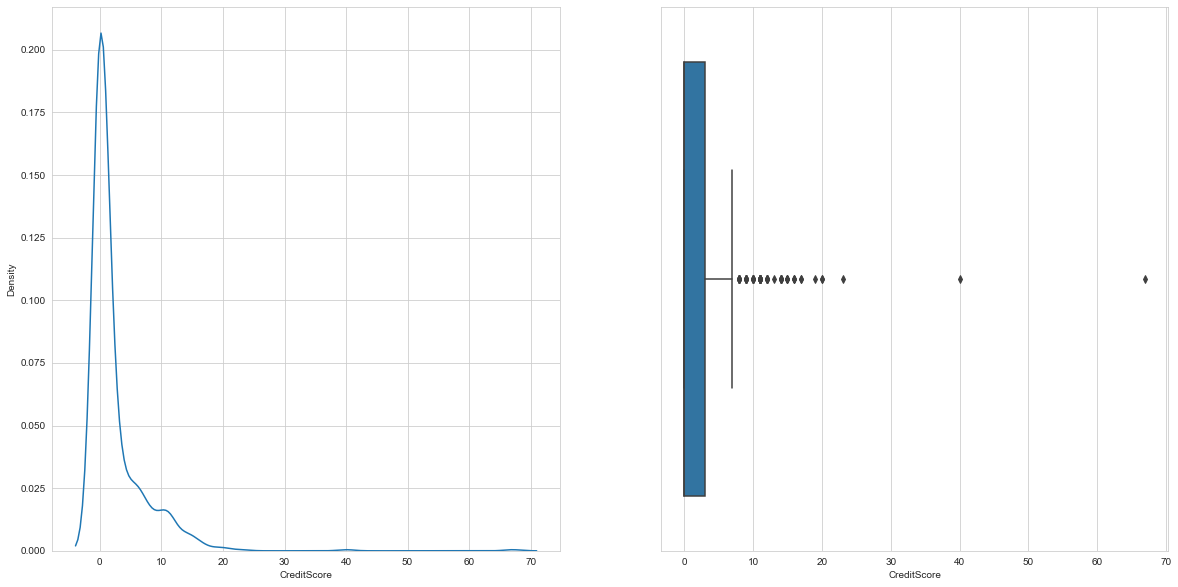

In [47]:
draw(dataset["CreditScore"])

### Features Is Normally Distributed

In [48]:
uppper_boundary=dataset['Age'].mean()+3*dataset['Age'].std()
lower_boundary=dataset['Age'].mean()-3*dataset['Age'].std()
print(lower_boundary),print(uppper_boundary),print(dataset['Age'].mean())

-3.9916472202254134
67.12798940311633
31.56817109144546


(None, None, None)

### Features Are Skewed

In [49]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=dataset.Debt.quantile(0.75)-dataset.Debt.quantile(0.25)

In [50]:
#### Extreme outliers
lower_bridge=dataset['Debt'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['Debt'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-17.6225
25.83


(None, None)

In [51]:
IQR=dataset.Income.quantile(0.75)-dataset.Income.quantile(0.25)

In [52]:
#### Extreme outliers
lower_bridge=dataset['Income'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['Income'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-1186.5
1582.0


(None, None)

In [53]:
IQR=dataset.YearsEmployed.quantile(0.75)-dataset.YearsEmployed.quantile(0.25)

In [54]:
#### Extreme outliers
lower_bridge=dataset['YearsEmployed'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['YearsEmployed'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-7.215
10.004999999999999


(None, None)

In [55]:
IQR=dataset.CreditScore.quantile(0.75)-dataset.CreditScore.quantile(0.25)

In [56]:
#### Extreme outliers
lower_bridge=dataset['CreditScore'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['CreditScore'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-9.0
12.0


(None, None)

In [57]:
data=dataset.copy()

### fix outlier

In [58]:
data.loc[data['Age']>67,'Age']=67

In [59]:
data.loc[data['Debt']>26,'Debt']=26

In [60]:
data.loc[data['Income']>1584,'Income']=1584

In [61]:
data.loc[data['YearsEmployed']>10,'YearsEmployed']=10

In [62]:
data.loc[data['CreditScore']>12,'CreditScore']=12

In [63]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in range(len(data)):
        z_score= (data[i] - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [64]:
outlier_pt=detect_outliers(data['Age'])
print(outlier_pt)

[130, 157, 206, 296, 405, 485, 539, 550, 585]


In [65]:
outlier_pt1=detect_outliers(data['Debt'])
print(outlier_pt1)

[44, 69, 234, 241, 250, 305, 317, 529, 550, 586]


In [66]:
outlier_pt2=detect_outliers(data['Income'])
print(outlier_pt2)

[]


In [67]:
outlier_pt3=detect_outliers(data['YearsEmployed'])
print(outlier_pt3)

[27, 39, 44, 71, 72, 73, 108, 116, 118, 130, 164, 171, 180, 185, 197, 205, 210, 212, 221, 231, 234, 242, 246, 250, 321, 365, 477, 549, 550, 564, 586]


# Preprocessing

The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:

Convert the non-numeric data into numeric.
Split the data into train and test sets.
Scale the feature values to a uniform range.
First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models require the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

In [68]:
dataset.shape

(690, 16)

In [69]:
data.drop(['ZipCode'], axis=1,inplace=True)

In [70]:
pd.get_dummies(data, drop_first=True).shape

(690, 41)

In [71]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,1


### one hot encoding

In [72]:
df1=pd.get_dummies(data[['Gender','Married','BankCustomer','PriorDefault','Employed','DriversLicense','Citizen']],drop_first=True)
data=pd.concat([df1,data],axis=1)
data.drop(['Gender','Married','BankCustomer','PriorDefault','Employed','DriversLicense','Citizen'],axis=1,inplace=True)

In [73]:
dataset.head(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1


### mean/target encoding

In [74]:
data['Approved'].value_counts().unique()

array([383, 307], dtype=int64)

In [75]:
data['Approved']=data['Approved'].astype(int)

In [76]:
EducationLevel_encoding=data.groupby(['EducationLevel'])['Approved'].mean().to_dict()
data['EducationLevel']=data['EducationLevel'].map(EducationLevel_encoding)
data.head(20)

,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,Approved
0,1,0,1,0,1,0,0,1,1,0,0,0,30.83,0.000,0.515625,v,1.250,1,0,1
1,0,0,1,0,1,0,0,1,1,0,0,0,58.67,4.460,0.653846,h,3.040,6,560,1
2,0,0,1,0,1,0,0,1,0,0,0,0,24.50,0.500,0.653846,h,1.500,0,824,1
3,1,0,1,0,1,0,0,1,1,1,0,0,27.83,1.540,0.515625,v,3.750,5,3,1
4,1,0,1,0,1,0,0,1,0,0,0,1,20.17,5.625,0.515625,v,1.710,0,0,1
5,1,0,1,0,1,0,0,1,0,1,0,0,32.08,4.000,0.421053,v,2.500,0,0,1
6,1,0,1,0,1,0,0,1,0,1,0,0,33.17,1.040,0.666667,h,6.500,0,1584,1
7,0,0,1,0,1,0,0,1,0,0,0,0,22.92,11.585,0.707317,v,0.040,0,1349,1
8,1,0,0,1,0,0,1,1,0,0,0,0,54.42,0.500,0.274510,h,3.960,0,314,1
9,1,0,0,1,0,0,1,1,0,1,0,0,42.50,4.915,0.515625,v,3.165,0,1442,1


In [77]:
Ethnicity_encoding=data.groupby(['Ethnicity'])['Approved'].mean().to_dict()
data['Ethnicity']=data['Ethnicity'].map(Ethnicity_encoding)
data.head()

,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,Approved
0,1,0,1,0,1,0,0,1,1,0,0,0,30.83,0.000,0.515625,0.423559,1.25,1,0,1
1,0,0,1,0,1,0,0,1,1,0,0,0,58.67,4.460,0.653846,0.630435,3.04,6,560,1
2,0,0,1,0,1,0,0,1,0,0,0,0,24.50,0.500,0.653846,0.630435,1.50,0,824,1
3,1,0,1,0,1,0,0,1,1,1,0,0,27.83,1.540,0.515625,0.423559,3.75,5,3,1
4,1,0,1,0,1,0,0,1,0,0,0,1,20.17,5.625,0.515625,0.423559,1.71,0,0,1


In [78]:
data.tail(5)

,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,Approved
685,1,0,0,1,0,0,1,0,0,0,0,0,21.08,10.085,0.560000,0.630435,1.25,0,0,0
686,0,0,1,0,1,0,0,0,1,1,0,0,22.67,0.750,0.452555,0.423559,2.00,2,394,0
687,0,0,0,1,0,0,1,0,1,1,0,0,25.25,13.500,0.132075,0.140351,2.00,1,1,0
688,1,0,1,0,1,0,0,0,0,0,0,0,17.92,0.205,0.351852,0.423559,0.04,0,750,0
689,1,0,1,0,1,0,0,0,0,1,0,0,35.00,3.375,0.452555,0.630435,8.29,0,0,0


### handling 0 values

In [79]:
dataset[dataset['Income']==0].shape[0]

295

In [80]:
dataset[dataset['CreditScore']==0].shape[0]

395

In [81]:
dataset["CreditScore"].nunique()

23

In [82]:
data['Income']=np.where(data['Income']==0,data['Income'].mean(),data['Income'])
data.head()

,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,Approved
0,1,0,1,0,1,0,0,1,1,0,0,0,30.83,0.000,0.515625,0.423559,1.25,1,321.692754,1
1,0,0,1,0,1,0,0,1,1,0,0,0,58.67,4.460,0.653846,0.630435,3.04,6,560.000000,1
2,0,0,1,0,1,0,0,1,0,0,0,0,24.50,0.500,0.653846,0.630435,1.50,0,824.000000,1
3,1,0,1,0,1,0,0,1,1,1,0,0,27.83,1.540,0.515625,0.423559,3.75,5,3.000000,1
4,1,0,1,0,1,0,0,1,0,0,0,1,20.17,5.625,0.515625,0.423559,1.71,0,321.692754,1


In [83]:
data.to_csv('feature-engineering.csv', index = False)